In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import f_oneway
pd.set_option("display.float_format", lambda x: "%.2f" %x)

In [2]:
df = pd.read_csv(r"C:\Users\admin\Downloads\Câu 1 2\restaurant_data.csv")
print(df.head(10))

           Name  Location   Cuisine  Rating  Seating Capacity  \
0  Restaurant 0     Rural  Japanese    4.00                38   
1  Restaurant 1  Downtown   Mexican    3.20                76   
2  Restaurant 2     Rural   Italian    4.70                48   
3  Restaurant 3     Rural   Italian    4.40                34   
4  Restaurant 4  Downtown  Japanese    4.90                88   
5  Restaurant 5  Downtown    Indian    4.40                79   
6  Restaurant 6     Rural   Mexican    4.90                49   
7  Restaurant 7  Suburban  Japanese    4.10                61   
8  Restaurant 8     Rural  Japanese    4.20                37   
9  Restaurant 9     Rural    French    5.00                32   

   Average Meal Price  Marketing Budget  Social Media Followers  \
0               73.98              2224                   23406   
1               28.11              4416                   42741   
2               48.29              2796                   37285   
3               

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,8368.00,4.01,0.58,3.00,3.50,4.00,4.50,5.00
Seating Capacity,8368.00,60.21,17.40,30.00,45.00,60.00,75.00,90.00
Average Meal Price,8368.00,47.90,14.34,25.00,35.49,45.53,60.30,76.00
Marketing Budget,8368.00,3218.25,1824.90,604.00,1889.00,2846.50,4008.50,9978.00
Social Media Followers,8368.00,36190.62,18630.15,5277.00,22592.50,32518.50,44566.25,103777.00
Chef Experience Years,8368.00,10.05,5.52,1.00,5.00,10.00,15.00,19.00
Number of Reviews,8368.00,523.01,277.22,50.00,277.00,528.00,764.25,999.00
Avg Review Length,8368.00,174.77,72.00,50.01,113.31,173.91,237.41,299.98
Ambience Score,8368.00,5.52,2.58,1.00,3.30,5.50,7.80,10.00
Service Quality Score,8368.00,5.51,2.59,1.00,3.20,5.60,7.80,10.00


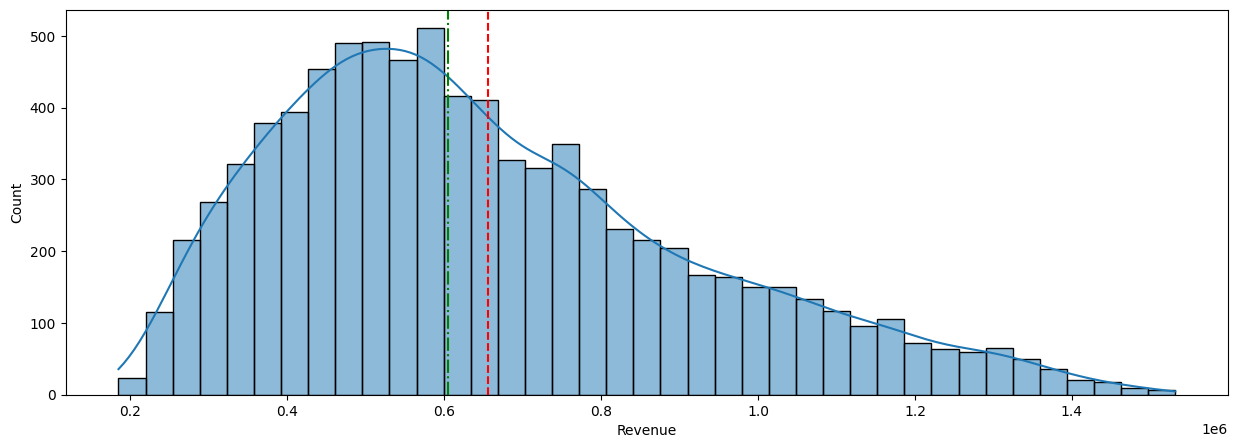

In [4]:
fig, hist = plt.subplots(1, 1, figsize=(15, 5))
sns.histplot(data=df, x='Revenue', ax=hist, kde=True)
hist.axvline(df['Revenue'].mean(), color='red', linestyle='--')
hist.axvline(df['Revenue'].median(), color='green', linestyle='dashdot')

In [5]:
np.random.seed(42)
df_revenue = df[['Revenue']]
data_sample = df_revenue.sample(100, ignore_index=True)
print('Sample size(n):',len(data_sample))

X_population = float(df_revenue.mean())
print(f'Population mean(μ_0): {X_population}')

sigma_population = df_revenue.std()
print(f'Population standard deviation(σ): {sigma_population}')

X_sample = data_sample.mean()
print(f'Sample mean(x̄): {X_sample}')

print(data_sample.info())
Z_score = float((X_sample - X_population) / (sigma_population / np.sqrt(len(data_sample))))
print(f"Z-score: {Z_score}")

Sample size(n): 100
Population mean(μ_0): 656070.5633508605
Population standard deviation(σ): Revenue   267413.74
dtype: float64
Sample mean(x̄): Revenue   648466.32
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes
None
Z-score: -0.28436257371485085


C:\Users\admin\AppData\Local\Temp\ipykernel_18196\2902713141.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  X_population = float(df_revenue.mean())
C:\Users\admin\AppData\Local\Temp\ipykernel_18196\2902713141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Z_score = float((X_sample - X_population) / (sigma_population / np.sqrt(len(data_sample))))


<Axes: ylabel='Count'>

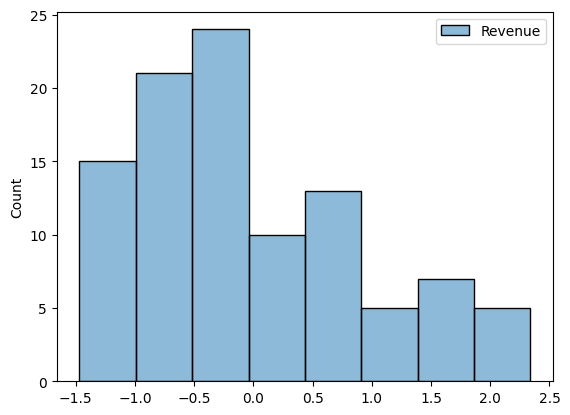

In [6]:
alpha = 0.05
Standardized_data_sample = (data_sample - X_population) / sigma_population
sns.histplot(Standardized_data_sample)

## Câu 1: Test a hypothesis and construct a confidence interval for the mean of a population.

In [7]:
from scipy.stats import norm
alpha = 0.05
critical_value_1 = norm.ppf(alpha / 2)
critical_value_2 = norm.ppf(1 - alpha / 2)
print(critical_value_1, critical_value_2)

-1.9599639845400545 1.959963984540054


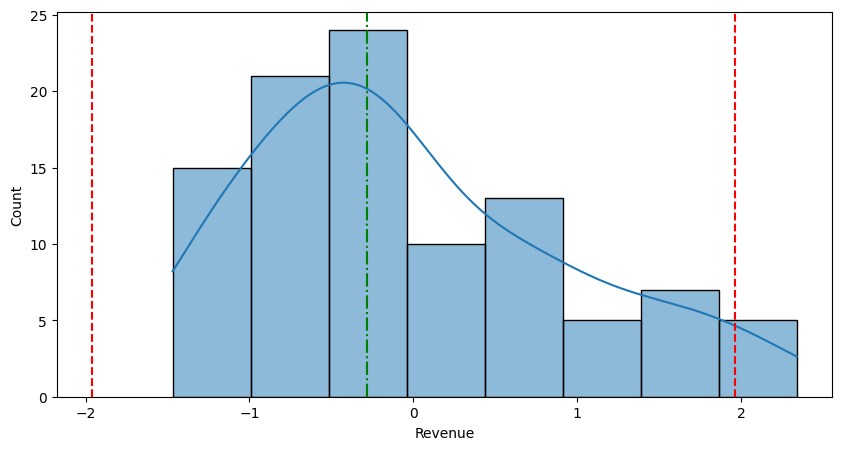

In [8]:
fig, hist = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=Standardized_data_sample, x='Revenue', ax=hist, kde=True)
hist.axvline(critical_value_1, color='red', linestyle='--')
hist.axvline(critical_value_2, color='red', linestyle='--')
hist.axvline(Z_score, color='green', linestyle='dashdot')

## Câu 2: Test a hypothesis and construct a confidence interval for the proportion of a population.

In [9]:
total_count = 100
X_population = df['Revenue'].mean()
data_sample = df[['Revenue']].sample(100, ignore_index=True)
success_count = data_sample[data_sample.Revenue > X_population].shape[0]

null_hypothesis = 0.05
alpha = 0.05

stat, p_value = proportions_ztest(success_count, total_count, null_hypothesis)

p_hat = success_count / total_count  
conf_int = stats.norm.interval(0.95, loc=p_hat, scale=np.sqrt(p_hat * (1 - p_hat) / total_count))

if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

print(f"Tỷ lệ mẫu (p̂): {p_hat:.2f}")
print(f"Test statistic: {stat: }")
print(f"P-value: {p_value: }")
print(f"Khoảng tin cậy 95% cho tỷ lệ: {conf_int}")

Reject null hypothesis
Tỷ lệ mẫu (p̂): 0.51
Test statistic:  9.201840552184064
P-value:  3.51870180755294e-20
Khoảng tin cậy 95% cho tỷ lệ: (0.4120214023731988, 0.6079785976268013)


In [10]:
#Câu 3
